<a href="https://colab.research.google.com/github/fatmaaerr/ML_Urbansound8k_project/blob/main/ML_Project_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"fatmaer","key":"02db3447e0d87603a7e4cb10816fe1b7"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key']

In [6]:
# Kaggle authentication and download
import kaggle
kaggle.api.authenticate()
!  kaggle datasets download chrisfilo/urbansound8k

100% 5.61G/5.61G [00:55<00:00, 176MB/s]
100% 5.61G/5.61G [00:55<00:00, 109MB/s]


In [7]:
! unzip urbansound8k.zip

Streaming output truncated to the last 5000 lines.
  inflating: fold4/151877-5-1-0.wav  
  inflating: fold4/154758-5-0-0.wav  
  inflating: fold4/154758-5-0-1.wav  
  inflating: fold4/154758-5-0-10.wav  
  inflating: fold4/154758-5-0-11.wav  
  inflating: fold4/154758-5-0-12.wav  
  inflating: fold4/154758-5-0-13.wav  
  inflating: fold4/154758-5-0-14.wav  
  inflating: fold4/154758-5-0-15.wav  
  inflating: fold4/154758-5-0-16.wav  
  inflating: fold4/154758-5-0-17.wav  
  inflating: fold4/154758-5-0-18.wav  
  inflating: fold4/154758-5-0-19.wav  
  inflating: fold4/154758-5-0-2.wav  
  inflating: fold4/154758-5-0-20.wav  
  inflating: fold4/154758-5-0-21.wav  
  inflating: fold4/154758-5-0-3.wav  
  inflating: fold4/154758-5-0-4.wav  
  inflating: fold4/154758-5-0-5.wav  
  inflating: fold4/154758-5-0-6.wav  
  inflating: fold4/154758-5-0-7.wav  
  inflating: fold4/154758-5-0-8.wav  
  inflating: fold4/154758-5-0-9.wav  
  inflating: fold4/155320-3-0-0.wav  
  inflating: fold4/156362

In [8]:
# Tensorflow download conda ile 2.6 google collaps ile 2.8
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
import wave

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

#library for  audio files
from librosa import display
import librosa as lb
import soundfile as sf
import IPython.display as ipd


TensorFlow version: 2.8.0


In [9]:

US8K = pd.read_csv("UrbanSound8K.csv")
print(US8K.shape)
US8K.head(20)

(8732, 8)


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


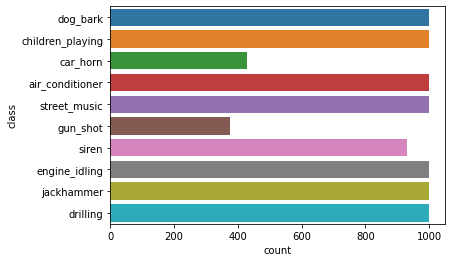

In [10]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
# sound_type = pd.DataFrame(data=data, columns=["class"])
ax = sns.countplot(y="class", data=US8K)

In [ ]:
#GunShot example

In [11]:
sr = sf.read('fold1/7061-6-0-0.wav')



In [12]:
#gunshot error
sr

(array([[0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00],
        ...,
        [3.05175781e-05, 0.00000000e+00],
        [3.05175781e-05, 3.05175781e-05],
        [0.00000000e+00, 0.00000000e+00]]), 44100)

In [13]:
import os
import numpy as np
%pylab inline
import glob
import librosa.display
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [15]:
gun_shot, sampling_rate = librosa.load('fold1/7061-6-0-0.wav')
gun_shot

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
       2.3116412e-05, 0.0000000e+00], dtype=float32)

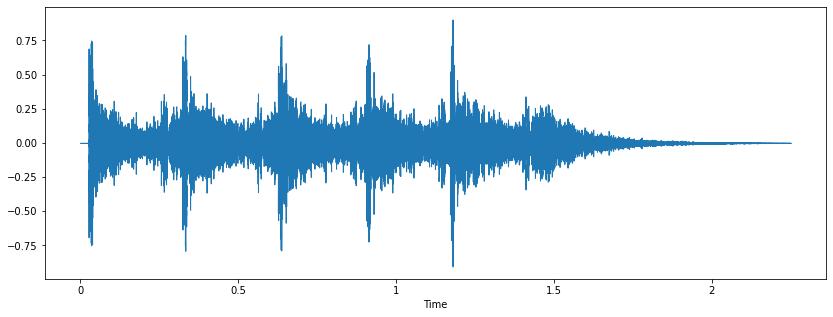

In [16]:
gun_shot,sample_rate = lb.load('fold1/7061-6-0-0.wav')

plt.figure(figsize=(14,5))

lb.display.waveshow(gun_shot,sr=sample_rate)

In [22]:
mfccs = librosa.feature.mfcc(gun_shot, sampling_rate)
mel =librosa.feature.melspectrogram(gun_shot, sampling_rate)
chroma_stft=librosa.feature.chroma_stft(gun_shot, sampling_rate,)
#chroma_cens=librosa.feature.chroma_cens(gun_shot, sampling_rate,)
mfccs.shape, mel.shape,chroma_stft.shape

((20, 97), (128, 97), (12, 97))

Text(0.5, 1.0, 'MFCC (Gun Shot)')

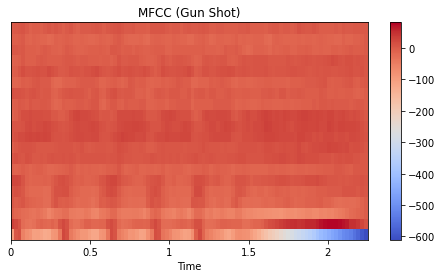

In [23]:
plt.figure(figsize=(8,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC (Gun Shot)')

In [24]:
mfccs

array([[-9.3800201e+01,  7.4964671e+00,  1.5476104e+01, ...,
        -5.6935333e+02, -5.9172742e+02, -6.1055634e+02],
       [ 3.0774035e+01,  2.3719746e+01,  1.1416364e+01, ...,
         4.3051193e+01,  2.5888163e+01,  1.2927567e+01],
       [-3.2866516e+00, -1.2030355e+01, -1.5005075e+01, ...,
        -1.1103722e+01, -7.5504947e+00,  2.2212185e-01],
       ...,
       [ 4.2977710e+00,  3.8997130e+00,  3.3824043e+00, ...,
        -7.6889539e-01, -1.4034278e+00,  2.7559929e+00],
       [-4.0482521e+00, -3.8530548e+00, -1.4768701e+00, ...,
        -5.1749096e+00, -3.4351161e+00,  2.5840187e+00],
       [ 3.3310986e+00,  4.8933163e+00,  6.6363349e+00, ...,
         4.0376663e+00,  3.6076698e+00,  3.9477415e+00]], dtype=float32)

Text(0.5, 1.0, 'Mel  Spectrogram (Gun Shot)')

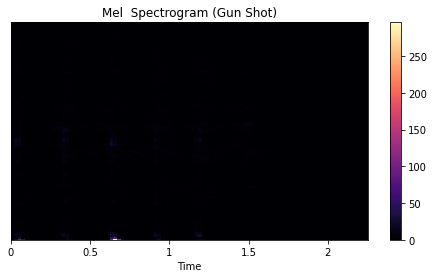

In [25]:
plt.figure(figsize=(8,4))
librosa.display.specshow(mel, x_axis='time')
plt.colorbar()
plt.title('Mel  Spectrogram (Gun Shot)')

Text(0.5, 1.0, 'chroma_stft (Gun Shot)')

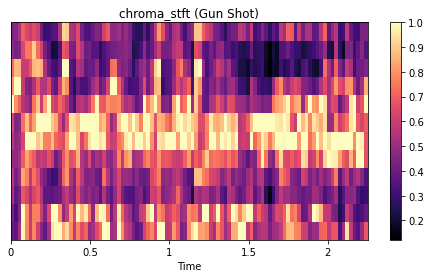

In [26]:
plt.figure(figsize=(8,4))
librosa.display.specshow(chroma_stft, x_axis='time')
plt.colorbar()
plt.title('chroma_stft (Gun Shot)')

What is this mfcc and why are we using it?
MFCCs are essentially like taking a Fourier Transform of the signal, however, MFCCs use Mel scaling to try to model the way that the human hearing audiotory system perceives sounds, rather than describe them on a purely frequency (Hz) basis. This means that the MFCC should represent the textural or timbre of the signal (the baby cry) as we might hear it (e.g. a 'piercing' cry or a 'discontent' cry).

In [ ]:
#https://jovian.ai/charmzshab/urban-sound-dataset

In [ ]:
#Selecting random row for each class in metadata

In [38]:
unique_audios = US8K.groupby(['class']).apply(lambda sub_df : sub_df.sample()).reset_index(drop = True)
unique_audios

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,13230-0-0-16.wav,13230,8.000000,12.000000,1,3,0,air_conditioner
1,175842-1-0-0.wav,175842,0.206442,0.688665,1,10,1,car_horn
2,178825-2-0-70.wav,178825,35.000000,39.000000,1,5,2,children_playing
3,38236-3-2-3.wav,38236,14.934856,18.934856,1,7,3,dog_bark
4,14113-4-0-1.wav,14113,0.500000,4.500000,1,1,4,drilling
5,94632-5-1-23.wav,94632,128.211980,132.211980,2,6,5,engine_idling
6,148838-6-0-0.wav,148838,0.248919,1.270571,1,3,6,gun_shot
7,105029-7-0-4.wav,105029,13.426527,17.426527,1,9,7,jackhammer
8,24347-8-0-49.wav,24347,28.620371,32.620371,2,4,8,siren
9,14386-9-0-16.wav,14386,8.000000,12.000000,1,8,9,street_music


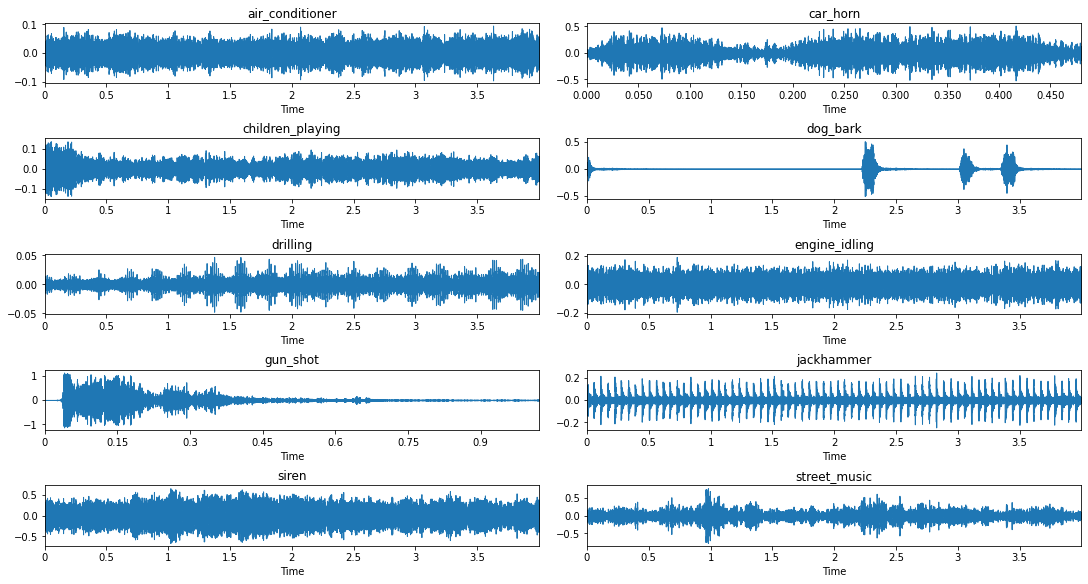

In [39]:
fig, axs = plt.subplots(5,2,figsize=(15,8),constrained_layout=True)
axs = np.reshape(axs, -1)

for (index,row),ax in zip(unique_audios.iterrows(),axs):
  ax.set_title(row.values[-1])
  data, sr = librosa.load(f"fold{row.values[-3]}/" + row.values[0])
  _ = librosa.display.waveplot(data, sr=sample_rate, ax=ax)


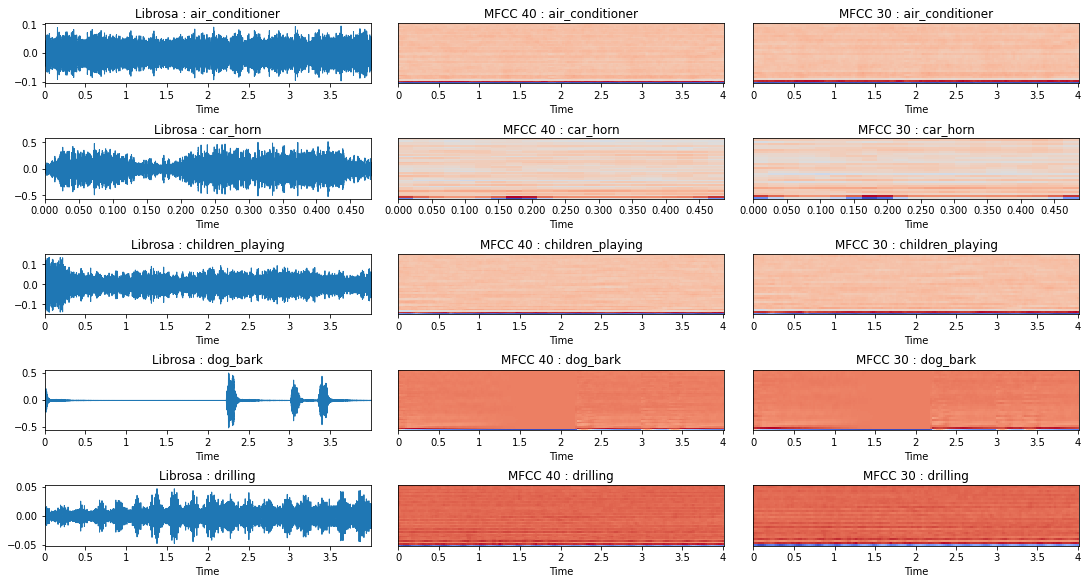

In [42]:
unique_audios_5 = unique_audios.head()
fig, axs = plt.subplots(5,3,figsize=(15,8),constrained_layout=True)

for (index,row),ax in zip(unique_audios_5.iterrows(),axs):
  
  file_path = f"./fold{row.values[-3]}/" + row.values[0]
  ax[0].set_title(f"Librosa : {row.values[-1]}")
  data, sr = librosa.load(file_path)
  _ = librosa.display.waveplot(data, sr=sr, ax=ax[0])

  ax[1].set_title(f"MFCC 40 : {row.values[-1]}")
  mfccs = librosa.feature.mfcc(data, n_mfcc= 40)
  librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])

  ax[2].set_title(f"MFCC 30 : {row.values[-1]}")
  mfccs = librosa.feature.mfcc(data, n_mfcc= 30)
  librosa.display.specshow(mfccs, x_axis='time', ax=ax[2])

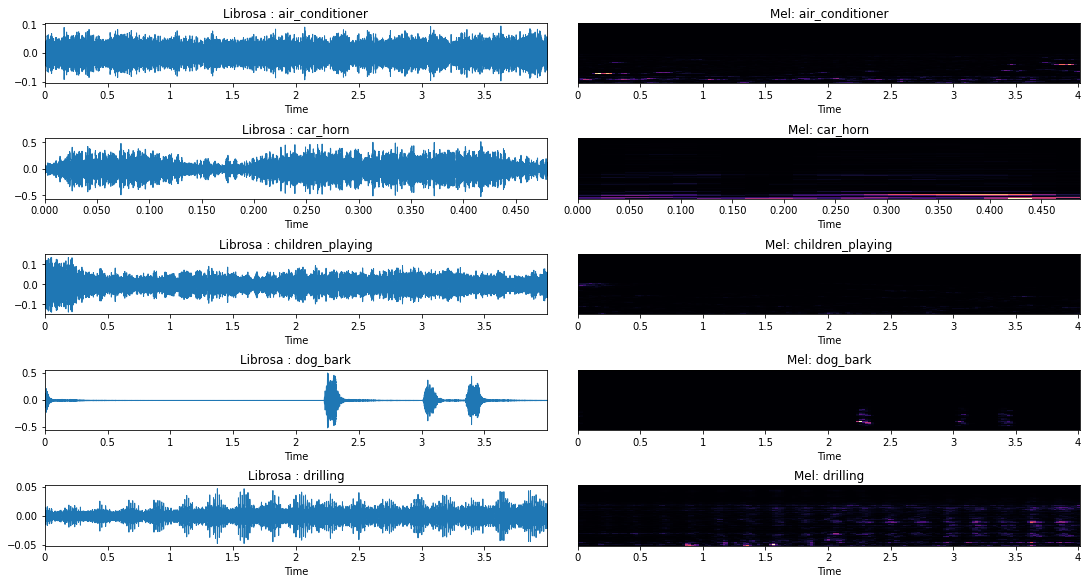

In [43]:
unique_audios_5 = unique_audios.head()
fig, axs = plt.subplots(5,2,figsize=(15,8),constrained_layout=True)

for (index,row),ax in zip(unique_audios_5.iterrows(),axs):
  
  file_path = f"fold{row.values[-3]}/" + row.values[0]
  ax[0].set_title(f"Librosa : {row.values[-1]}")
  data, sr = librosa.load(file_path)
  _ = librosa.display.waveplot(data, sr=sr, ax=ax[0])

  ax[1].set_title(f"Mel: {row.values[-1]}")
  mel = librosa.feature.melspectrogram(data)
  librosa.display.specshow(mel, x_axis='time', ax=ax[1])


In [ ]:
mel =librosa.feature.melspectrogram(gun_shot, sampling_rate)
chroma_stft=librosa.feature.chroma_stft(gun_shot, sampling_rate,)

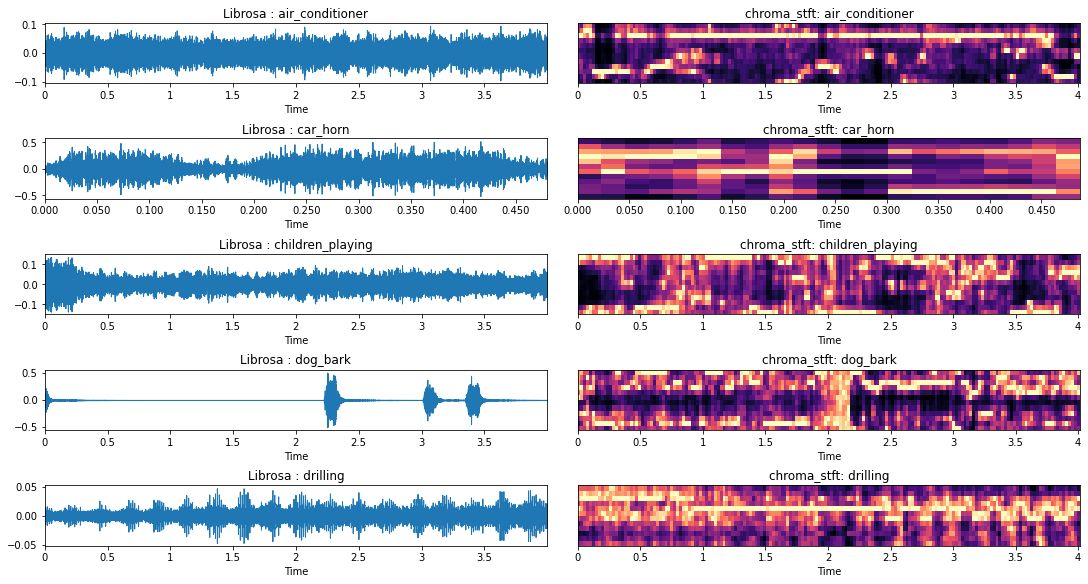

In [44]:
unique_audios_5 = unique_audios.head()
fig, axs = plt.subplots(5,2,figsize=(15,8),constrained_layout=True)

for (index,row),ax in zip(unique_audios_5.iterrows(),axs):
  
  file_path = f"fold{row.values[-3]}/" + row.values[0]
  ax[0].set_title(f"Librosa : {row.values[-1]}")
  data, sr = librosa.load(file_path)
  _ = librosa.display.waveplot(data, sr=sr, ax=ax[0])

  ax[1].set_title(f"chroma_stft: {row.values[-1]}")
  chroma_stft = librosa.feature.chroma_stft(data)
  librosa.display.specshow(chroma_stft, x_axis='time', ax=ax[1])